In [1]:
# Examen 3 de Análisis de datos atmosféricos.
# ICACC - UNAM - maestría.
# 2 de noviembre de 2021.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.stats.diagnostic import lilliefors

In [25]:
# Ejercicio 1
# Prueba de hipótesis para la resta
# de medias bajo independencia.

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname, index_col = "Year")

# Se paramos los conjuntos.
df_Nino = ( df.where( df["El Niño"] )
    .dropna() )["Temperature"]
df_Nina = ( df.where( ~df["El Niño"] )
    .dropna() )["Temperature"]

# Clave para distinguir los datos
o = df_Nino
a = df_Nina

# Estadísticos.
m_o = o.mean()
s_o = o.std()
n_o = o.shape[0]
v_o = s_o ** 2 / n_o
m_a = a.mean()
s_a = a.std()
n_a = a.shape[0]
v_a = s_a ** 2 / n_a
m_d = np.abs( m_o - m_a )
v_d = v_o + v_a
s_d = np.sqrt( v_d )

# Estadístico de prueba.
z = m_d / np.sqrt( v_d )

# Valor p.
p = stats.norm.cdf(z)

# Intervalo de confianza.
alpha = 0.5
crit = stats.norm.ppf( alpha / 2 )
error = crit * s_d
conf = [ m_d + error, m_d - error ]

print("Ejercicio 1")
print("o -> Niño")
print("a -> Niña")
print("d -> Delta, o - a")
print(f"mu_o:    {m_o:.3f}")
print(f"sigma_o:  {s_o:.3f}")
print(f"var_o:    {v_o:.3f}")
print(f"n_o:      {n_o}")
print(f"mu_a:    {m_a:.3f}")
print(f"sigma_a:  {s_a:.3f}")
print(f"var_a:    {v_a:.3f}")
print(f"n_a:      {n_a}")
print(f"mu_d:     {m_d:.3f}")
print(f"sigma_d:  {s_d:.3f}")
print(f"var_d:    {v_d:.3f}")
print(f"z:        {z:.3f}")
print("1.a: prueba de hipótesis.")
print("Prueba bilateral")
print(f"p:     {p:.6f}")
print("1.b: Intervalo de confianza.")
print(f"alpha:    {alpha:.3f}")
print(f"z_crit:  {crit:.3f}")
print(f"error:   {error:.3f}")
print(f"confianza: [ {conf[0]:.3f}"
    f" , {conf[1]:.3f} ]")


Ejercicio 1
o -> Niño
a -> Niña
d -> Delta, o - a
mu_o:    26.140
sigma_o:  0.792
var_o:    0.126
n_o:      5
mu_a:    24.307
sigma_a:  0.491
var_a:    0.017
n_a:      14
mu_d:     1.833
sigma_d:  0.378
var_d:    0.143
z:        4.850
1.a: prueba de hipótesis.
Prueba bilateral
p:     0.999999
1.b: Intervalo de confianza.
alpha:    0.500
z_crit:  -0.674
error:   -0.255
confianza: [ 1.578 , 2.088 ]


In [12]:
# Ejercicio 2
# Prueba de hipótesis para la resta
# de medias con correlación serial.

# Datos.
path = "../datos/A.1_Wilks.csv"
df = pd.read_csv(path)[["Ithaca - Min Temp",
    "Canandaigua - Min Temp"]]

# Delta de temperatura.
# Positivo: Canandaigua
#  es mayor que Ithaca.
df["delta"] = ( df["Canandaigua - Min Temp"]
    - df["Ithaca - Min Temp"] )
var = "delta"

# Estadísticos de Delta.
mu = df[var].mean()
sigma = df[var].std()
rho1 = df[var].autocorr()
n = df.shape[0]

# Ajuste por correlación serial.
n_prim = n * ( 1 - rho1 ) / ( 1 + rho1 )

# Varianza con ajuste.
var = sigma ** 2 / n_prim

# Estadístico de prueba.
z = mu / np.sqrt(var)

# Valor p.
p_bi = stats.norm.cdf(z)
p_uni = 1 - ( 1 - p_bi ) / 2 

print("Ejercicio 2")
print(f"mu:      {mu:.3f}")
print(f"sigma:   {sigma:.3f}")
print(f"rho1:    {rho1:.3f}")
print(f"n:      {n:.3f}")
print(f"n_prim: {n_prim:.3f}")
print(f"var:     {var:.3f}")
print(f"z:       {z:.3f}")
print("2.a: prueba bilateral.")
print(f"p:    {p_bi:.6f}")
print("2.b: prueba unilateral.")
print(f"p:    {p_uni:.6f}")


Ejercicio 2
mu:      7.226
sigma:   6.438
rho1:    0.419
n:      31.000
n_prim: 12.699
var:     3.264
z:       4.000
2.a: prueba bilateral.
p:    0.999968
2.b: prueba unilateral.
p:    0.999984


Chi-square
Chi : 1.04
p   : 0.5931

Lilliefors
n   : 30
D_s :  0.152
p   :  0.074


(0.0, 1.0)

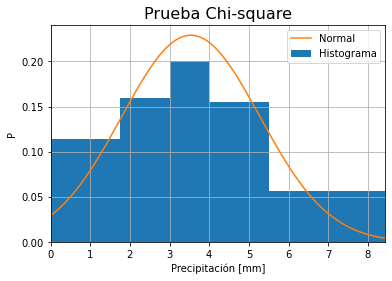

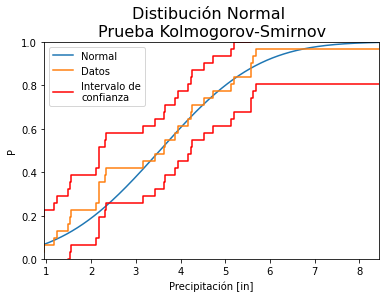

In [180]:
# Ejercicio 3

# Datos
path_d = "../datos/"
fname = "Table 4.8.csv"
df = pd.read_csv(path_d + fname,
    index_col = "Year")
var = "Precipitation"

# Ajuste de parámetros.
mu, sigma = stats.norm.fit( df[var] )
# Parámetros estimados.
params = 2

# 3.a: Chi-square
# Histograma de datos observados.
bins_lim = [ 0, 1.75, 3, 4, 5.5,
    df[var].max() ]
n_obs, bins = np.histogram( 
    df[var], bins = bins_lim )

# Se discretizan las distribuciones continuas.
prob_norm = np.array( [
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[2], mu, sigma) -
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[3], mu, sigma) -
    stats.norm.cdf(bins_lim[2], mu, sigma),
    stats.norm.cdf(bins_lim[4], mu, sigma) -
    stats.norm.cdf(bins_lim[3], mu, sigma),
    stats.norm.sf(bins_lim[4], mu, sigma) 
    ] )
n_norm = n_obs.sum() * prob_norm

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()

df[var].hist( bins = bins_lim,
    density = True, ax = ax )

x = np.linspace(0, df[var].max(), 1000)
y = stats.norm.pdf(x, mu, sigma)

ax.plot(x, y)

ax.set_title("Prueba Chi-square",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Normal", "Histograma"])
ax.set_xlim(0, bins_lim[-1])
ax.set_ylim(0)

# Prueba chi-square.
alpha_test = 0.05
clases = bins.shape[0] - 1
nu = clases - params - 1
crit = stats.chi.ppf(1 - alpha_test, nu)

AUTO = False
#AUTO = True
if AUTO:
    # Automática.
    chi_test = stats.chisquare(
        n_obs, n_norm, ddof = params)
    chi = chi_test.statistic
    p = chi_test.pvalue
else:
    # Manual.
    chi = ( ( n_obs - n_norm ) ** 2
        / n_norm ).sum()
    p = stats.chi.sf(chi, nu)

print("Chi-square")
print(f"Chi : {chi:.2f}")
print(f"p   : {p:.4f}")
print(f"crit: {crit:.4f}")

# 3.b. Lilliefors
# Prueba Kolmogorov-Smirnov.

# Tamaño de la muestra.
n = df[var].shape[0]

# Frecuencia acumulada.
# Criterio de Weibull.
F = ( range( 1, n + 1 ) /
    np.float64( n + 1 ) )

# Frecuencia acumulada de
# distribución normal.
x = df[var].sort_values()
F_n = stats.norm.cdf(
    x, mu, sigma )

# Lilliefors critical value.
crit = 0.161
if AUTO:
    # Automático.
    # Smirnov test statistic.
    D_s, p = lilliefors( df[var] )
else:
    # Manual.
    # Smirnov test statistic.
    D = np.abs( F - F_n )
    D_s = D.max()
    alpha = 0.05

print("")
print("Lilliefors")
print(f"n   : {n}")
print(f"D_s :  {D_s:.3f}")
if AUTO:
    print(f"p   :  {p:.3f}")
print(f"crit:  {crit:.3f}")

# Graficamos las distribuciones.
x_n = np.linspace( df[var].min(),
    df[var].max(), 1000 )
y_n = stats.norm.cdf( x_n, mu, sigma )
fig, ax = plt.subplots()
ax.plot(x_n, y_n)

# Grficamos la frecuencia acumulada.
ax.plot(df[var].sort_values(),
    F, drawstyle = "steps")

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot( x, F - crit,
    drawstyle = "steps", color = "red" )
ax.plot( x, F + crit,
    drawstyle = "steps", color = "red" )

ax.set_title("Distibución Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[var].min(), df[var].max() )
ax.set_ylim(0, 1)

In [ ]:
# Ejercicio 4

Estadísticos
mean     : 20.81
std      : 13.46

Chi-square
Gamma
Chi : 2.78
p   : 0.1017
Binomial Negativa
Chi : 2.96
p   : 0.0668
crit: 3.0802


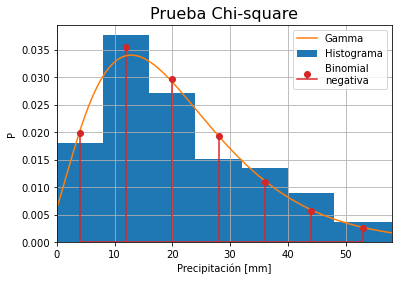

In [106]:
# Ejercicio 5

# Datos
path_d = "../datos/"
fname = "Datos_HurrDays_1900-1983.csv"
df = pd.read_csv(path_d + fname,
    sep = "\s+", header = 0,
    names = ["Year", "Hurr_days"],
    index_col = "Year")
v = "Hurr_days"

# Estadísticos
mean = df[v].mean()
std = df[v].std()

print("Estadísticos")
print( f"mean     : {mean:.2f}" )
print( f"std      : {std:.2f}" )

# Ajuste de parámetros.
# Distribución continua gamma.
alpha, zeta, beta = stats.gamma.fit(
    df[v], loc = 0 )
# Distribución discreta binomial negativa.
p = mean / std ** 2
k = mean ** 2 / (std ** 2 - mean)
# Parámetros estimados.
params = 2

# 3.a: Chi-square
# Histograma de datos observados.
bins_lim = [ 0, 8, 16, 24, 32, 40, 48,
    df[v].max() + 1 ]
n_obs, bins = np.histogram( 
    df[v], bins = bins_lim )

# Se discretizan las distribuciones continuas.
prob_gamma = np.array( [
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[5], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[6], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[5], alpha, zeta, beta),
    stats.gamma.sf( bins_lim[6], alpha, zeta, beta) 
    ] )
n_gamma = n_obs.sum() * prob_gamma

# Histograma de la distribución discreta
mbins = [
    ( bins_lim[1] + bins_lim[0] ) / 2,
    ( bins_lim[2] + bins_lim[1] ) / 2,
    ( bins_lim[3] + bins_lim[2] ) / 2,
    ( bins_lim[4] + bins_lim[3] ) / 2,
    ( bins_lim[5] + bins_lim[4] ) / 2,
    ( bins_lim[6] + bins_lim[5] ) / 2,
    ( bins_lim[7] + bins_lim[6] ) / 2
    ]
wbins = [
    bins_lim[1] - bins_lim[0],
    bins_lim[2] - bins_lim[1],
    bins_lim[3] - bins_lim[2],
    bins_lim[4] - bins_lim[3],
    bins_lim[5] - bins_lim[4],
    bins_lim[6] - bins_lim[5],
    bins_lim[7] - bins_lim[6]
    ]
prob_nbinom = np.array( [
    stats.nbinom.pmf( mbins[0], k, p ),
    stats.nbinom.pmf( mbins[1], k, p ),
    stats.nbinom.pmf( mbins[2], k, p ),
    stats.nbinom.pmf( mbins[3], k, p ),
    stats.nbinom.pmf( mbins[4], k, p ),
    stats.nbinom.pmf( mbins[5], k, p ),
    stats.nbinom.pmf( mbins[6], k, p ),
    ] )
n_nbinom = n_obs.sum() * prob_nbinom * wbins

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()

df[v].hist( bins = bins_lim,
    density = True,
    ax = ax )

x_cont = np.linspace(0, bins_lim[-1], 1000)
y_gamma = stats.gamma.pdf(
    x_cont, alpha, zeta, beta)

y_nbinom = stats.nbinom.pmf(
    df[v].sort_values(),
    alpha, zeta, beta)

ax.plot(x_cont, y_gamma)
ax.stem( mbins, prob_nbinom,
    linefmt = "C3-",
    markerfmt = "C3o" )

ax.set_title("Prueba Chi-square",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Gamma", "Histograma",
 "Binomial\nnegativa"])
ax.set_xlim(0, bins_lim[-1])
ax.set_ylim(0)

# Prueba chi-square.
alpha_test = 0.05
clases = bins.shape[0] - 1
nu = clases - params - 1
crit = stats.chi.ppf(1 - alpha_test, nu)

AUTO = False
#AUTO = True
if AUTO:
    # Automática.
    chi_test_gamma = stats.chisquare(
        n_obs, n_gamma, ddof = params)
    chi_gamma = chi_test_gamma.statistic
    p_gamma = chi_test_gamma.pvalue
    chi_test_nbinom = stats.chisquare(
        n_obs, n_nbinom, ddof = params)
    chi_nbinom = chi_test_nbinom.statistic
    p_nbinom = chi_test_nbinom.pvalue
else:
    # Manual.
    chi_gamma = ( ( n_obs - n_gamma ) ** 2
        / n_gamma ).sum()
    chi_nbinom = ( ( n_obs - n_nbinom ) ** 2
        / n_nbinom ).sum()
    p_gamma = stats.chi.sf(chi_gamma, nu)
    p_nbinom = stats.chi.sf(chi_nbinom, nu)

print("")
print("Chi-square")
print("Gamma")
print(f"Chi : {chi_gamma:.2f}")
print(f"p   : {p_gamma:.4f}")
print("Binomial Negativa")
print(f"Chi : {chi_nbinom:.2f}")
print(f"p   : {p_nbinom:.4f}")
print(f"crit: {crit:.4f}")


In [95]:
n_nbinom.sum()

15.981679898290068

In [96]:
df[v].sum()

1727

In [104]:
n_obs.sum()

83

In [105]:
wbins * prob_nbinom * n_obs.sum()

array([13.18909446, 23.59798065, 19.75949976, 12.79127238,  7.26206363,
        3.80667363,  2.15948257])

Estadísticos
mean     : 0.57
median   : 0.35
mode     : 0.35
std      : 0.58
var      : 0.34
skewness : 2.46
quartiles: 0.21, 0.35, 0.73
IQR      : 0.53
range    : 3.56

Distribución Gamma
alpha: 0.714
beta : 0.643

Lilliefors
n   : 307
D_s :   0.213
crit:   0.060
p   :   0.001


(0.0, 1.0)

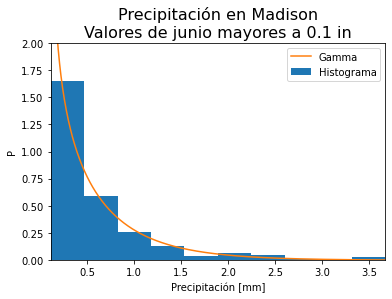

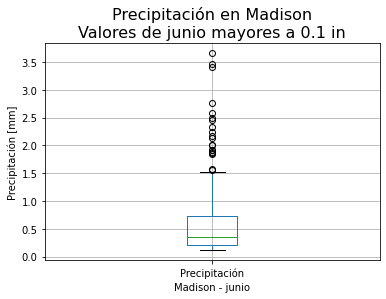

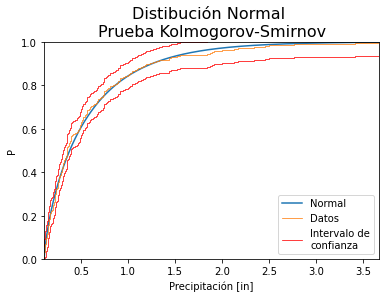

In [14]:
# Ejercicio 6

# Datos.
path  = "../datos/"
fname = "data_madison_precip.txt"
v   = "Precipitación"

# Se lee el archivo .dat
# y se ajusta su formato.
df = pd.read_table(path + fname,
    names = [v], sep = "\s+")
df.index.set_names(["Year", "Month", "Day"],
    inplace = True)

# Se e☼cogen los datos de
# junio mayores a 0.1 in.
df = df.xs(6, level = "Month")
df = df.where(df > 0.1).dropna()

# Estadísticos
mean = df[v].mean()
median = df[v].median()
mode = df[v].mode()[0]
std = df[v].std()
var = df[v].var()
skew = df[v].skew()
quartiles = [ df[v].quantile(0.25), 
    df[v].quantile(),
    df[v].quantile(0.75)]
IQR = ( df[v].quantile(0.75)
    - df[v].quantile(0.25) )
rango = df[v].max() - df[v].min()

print("Estadísticos")
print( f"mean     : {mean:.2f}" )
print( f"median   : {median:.2f}" )
print( f"mode     : {mode:.2f}" )
print( f"std      : {std:.2f}" )
print( f"var      : {var:.2f}" )
print( f"skewness : {skew:.2f}" )
print( f"quartiles: {quartiles[0]:.2f}, "
    f"{quartiles[1]:.2f}, {quartiles[2]:.2f}" )
print( f"IQR      : {IQR:.2f}" )
print( f"range    : {rango:.2f}" )

# Ajuste de parámetros.
alpha, zeta, beta = stats.gamma.fit(
    df[v])#, loc = 0)

print("")
print("Distribución Gamma")
print(f"alpha: {alpha:.3f}")
print(f"beta : {beta:.3f}")

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()
n_obs, bins, patches = plt.hist( 
    df[v], density = True)

x = np.linspace(0, df[v].max(), 1000)
y = stats.gamma.pdf(x, alpha, zeta, beta)
ax.plot(x, y)

ax.set_title("Precipitación en Madison\n"
    "Valores de junio mayores a 0.1 in",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Gamma", "Histograma"])
ax.set_ylim(0, 2)
ax.set_xlim(bins[0], bins[-1])

fig, ax = plt.subplots()
df.boxplot(ax = ax)

ax.set_title("Precipitación en Madison\n"
    "Valores de junio mayores a 0.1 in",
    fontsize = 16)
ax.set_xlabel("Madison - junio")
ax.set_ylabel("Precipitación [mm]")

# Prueba Kolmogorov-Smirnov - Lilliefors.

# Tamaño de la muestra.
n = df[v].shape[0]

# Frecuencia acumulada.
# Criterio de Weibull.
F = ( range( 1, n + 1 ) /
    np.float64( n + 1 ) )

# Frecuencia acumulada de
# distribución normal.
x = df[v].sort_values()
F_n = stats.gamma.cdf(
    alpha, zeta, beta )

# Lilliefors critical value.
crit = 1.05 / np.sqrt( n )

AUTO = True
#AUTO = False
if AUTO:
    # Automático.
    # Smirnov test statistic.
    D_s, p = lilliefors( df[v] )
else:
    # Manual.
    # Smirnov test statistic.
    D = np.abs( F - F_n )
    D_s = D.max()
    alpha_test = 0.05

print("")
print("Lilliefors")
print(f"n   : {n}")
print(f"D_s :   {D_s:.3f}")
print(f"crit:   {crit:.3f}")
if AUTO:
    print(f"p   :   {p:.3f}")

# Graficamos las distribuciones.
x_n = np.linspace( df[v].min(),
    df[v].max(), 1000 )
y_n = stats.gamma.cdf(
    x_n, alpha, zeta, beta )
fig, ax = plt.subplots()
ax.plot(x_n, y_n)

# Graficamos la frecuencia acumulada.
ax.plot(df[v].sort_values(), F,
    drawstyle = "steps", linewidth = 0.75)

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot( x, F - crit, drawstyle = "steps",
    color = "red", linewidth = 0.75 )
ax.plot( x, F + crit, drawstyle = "steps",
    color = "red", linewidth = 0.75 )

ax.set_title("Distibución Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[v].min(), df[v].max() )
ax.set_ylim(0, 1)
